In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from datetime import datetime
print(os.getcwd())

%matplotlib widget

from jfunctions import *

# Get directory locations from param file
base_dir, run_dir, save_dir, version = read_params("./params.dat")

print(base_dir)

/mhome/damtp/q/cwp29/diablo3/proc/jupyter/moisture
/store/ATMOS/cwp29/data/moisture/moist_exp/q0_02_phi0_026


In [2]:
#Load simulation data
phi_p, phi_c, phi_v, times = load_data('th4_xz', 'th3_xz', 'th2_xz')
var2 = phi_c
var1 = phi_v
NSAMP = len(times)

times, t0_idx = calibrate_time(save_dir, times)

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Keys: <KeysViewHDF5 ['B_xy', 'B_xz', 'B_yz', 'Ent_phic_flux_int', 'Ent_phic_flux_rec', 'Ent_phip_flux_int', 'Ent_phip_flux_rec', 'Ent_phiv_flux_int', 'Ent_phiv_flux_rec', 'N2_xy', 'N2_xz', 'N2_yz', 'Re_b_xy', 'Re_b_xz', 'Re_b_yz', 'Ri_xy', 'Ri_xz', 'Ri_yz', 'b_phic_F1', 'b_phic_F3', 'b_phic_Jc', 'b_phic_K', 'b_phic_M', 'b_phic_S', 'b_phic_W', 'b_phip_F1', 'b_phip_F4', 'b_phip_M', 'b_phip_S', 'b_phip_W', 'b_phiv_F1', 'b_phiv_F2', 'b_phiv_Jv', 'b_phiv_M', 'b_phiv_S', 'b_phiv_W', 'chi1_xy', 'chi1_xz', 'chi1_yz', 'chi2_xy', 'chi2_xz', 'chi2_yz', 'chi3_xy', 'chi3_xz', 'chi3_yz', 'chi4_xy', 'chi4_xz', 'chi4_yz', 'diff_th1_xy', 'diff_th1_xz', 'diff_th1_yz', 'diff_th2_xy', 'diff_th2_xz', 'diff_th2_yz', 'diff_th3_xy', 'diff_th3_xz', 'diff_th3_yz', 'diff_th4_xy', 'diff_th4_xz', 'diff_th4_yz', 'epsilon_xy', 'epsilon_xz', 'epsilon_yz', 'kappa_t1_xy', 'kappa_t1_xz', 'kappa_t1_yz', 'kappa_t2_xy', 'kappa_t2_xz', 'kappa_t2_yz', 'kappa_t3_xy', 'kappa_t3_xz', 'kappa_t3_yz', 'kappa_t4_xy', 'kappa_t4_xz',

In [3]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 5.0, 'VERSION': 3.12, 'NU_START_TIME': 15.0, 'r0': 0.002, 'alpha_e': 0.11, 'b0': 0.2, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.2, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.2, 'phiv_factor': 1.0, 'phic_factor': 0.6, 'Nb': 256.0, 'Nphi': 256.0, 'F_TYPE': 3.0, 'phi0': 0.26, 'alpha': 67.0, 'beta': 0.51, 'tau': 0.1, 'q0': 0.2, 'phiv_min': 0.0002, 'phic_min': 0.0002, 'T': 10.0, 'Trelax': 0.5, 'w_s': 0.0, 'INIT_NOISE': 1e-08, 'shear_rate': 0.2, 'Nx': 256, 'Ny': 256, 'Nz': 257, 'Nth': 4}


In [4]:
#Create grid
X, Y = np.meshgrid(gx, gz)
Xf, Yf = np.meshgrid(gxf, gzf)

print("Total time steps: %s"%NSAMP)
print("Dimensional times: ",times)


Total time steps: 97
Dimensional times:  [-3.90633842 -3.65633842 -3.40633842 -3.15633842 -2.90633842 -2.65633842
 -2.40633842 -2.15633842 -1.90633842 -1.65633842 -1.40633842 -1.15633842
 -0.90633842 -0.65633842 -0.40633842 -0.15633842  0.          0.25
  0.5         0.75        1.          1.25        1.5         1.75
  2.          2.25        2.5         2.75        3.          3.25
  3.5         3.75        4.          4.25        4.5         4.75
  5.          5.25        5.5         5.75        6.          6.25
  6.5         6.75        7.          7.25        7.5         7.75
  8.          8.25        8.5         8.75        9.          9.25
  9.5         9.75       10.         10.25       10.5        10.75
 11.         11.25       11.5        11.75       12.         12.25
 12.5        12.75       13.         13.25       13.5        13.75
 14.         14.25       14.5        14.75       15.         15.25
 15.5        15.75       16.         16.25       16.5        16.75
 17.     

Setting up data arrays...
Setting up initial plot...
Starting plot...


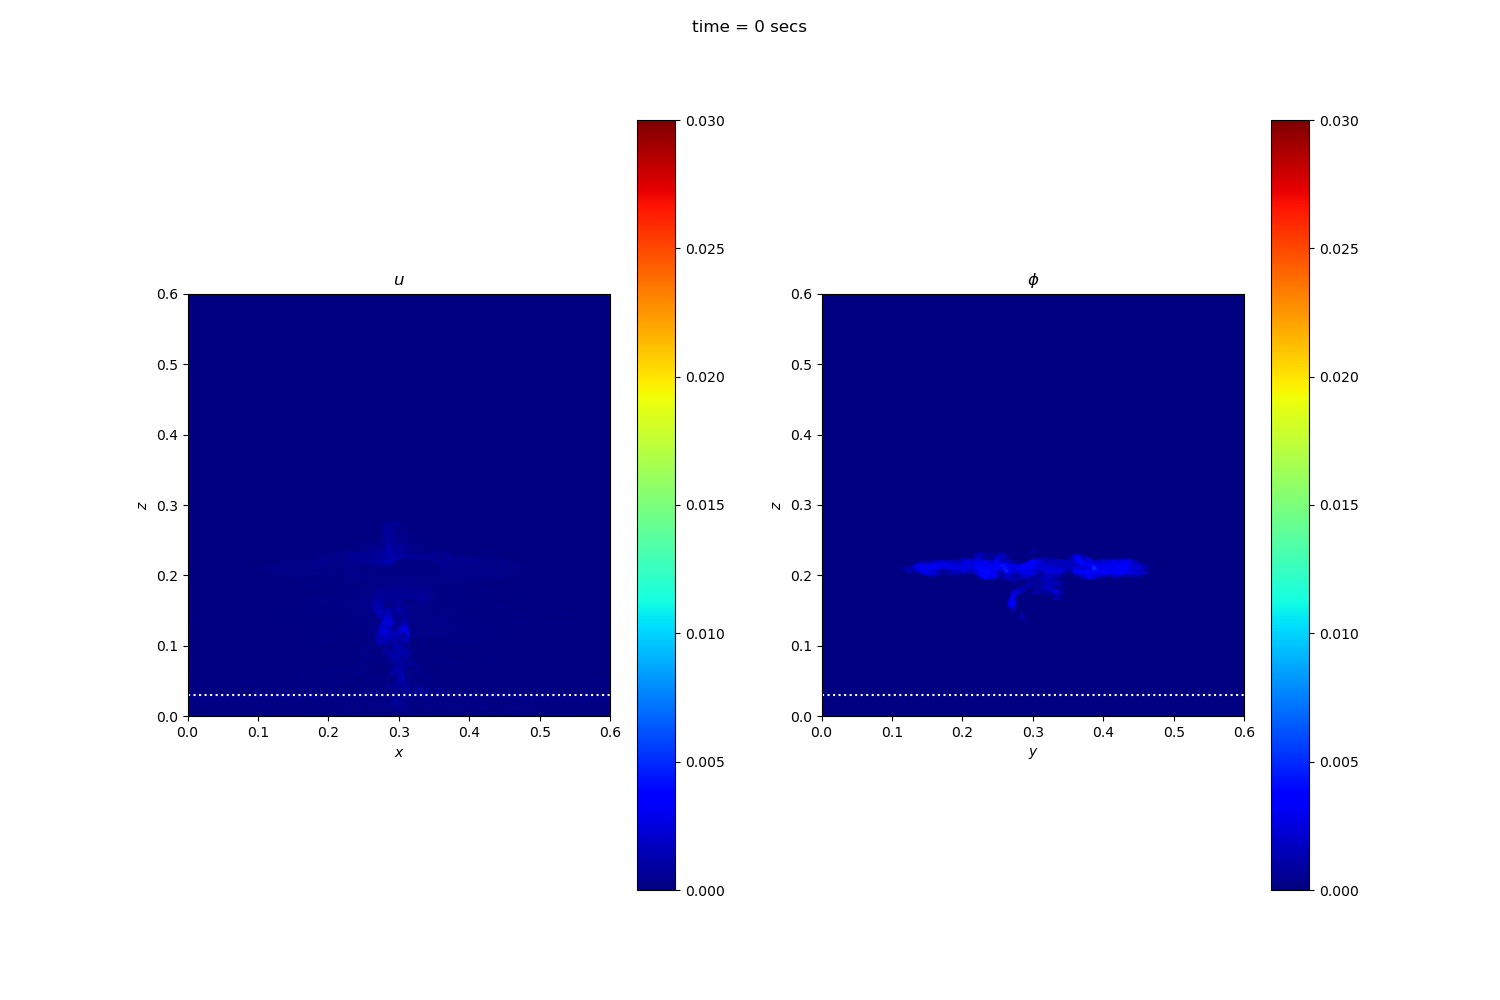

In [5]:
print("Setting up data arrays...")
fig, axs = plt.subplots(1,2,figsize=(15, 10))
ims = np.array([None,None])
cb = np.array([None,None])

print("Setting up initial plot...")
ims[0] = axs[0].pcolormesh(X, Y, var1[-1], cmap='jet')
ims[1] = axs[1].pcolormesh(X, Y, var2[-1], cmap='jet')

# Add forcing level
axs[0].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')
axs[1].axhline(md['Lyc']+md['Lyp'],color='white', linestyle=':')

cb[0] = plt.colorbar(ims[0],ax=axs[0])
cb[1] = plt.colorbar(ims[1],ax=axs[1])

ims[0].set_clim(0, 3e-2)
ims[1].set_clim(0, 3e-2)

fig.suptitle("time = 0 secs")
axs[0].set_ylabel("$z$")
axs[1].set_ylabel("$z$")
axs[0].set_xlabel("$x$")
axs[1].set_xlabel("$y$")

axs[0].set_ylim(0, 3*md['H'])
axs[1].set_ylim(0, 3*md['H'])

#axs[0].set_xlim(0.2, 0.4)
#axs[1].set_xlim(0.2, 0.4)

axs[0].set_aspect(1)
axs[1].set_aspect(1)

axs[0].set_title(r"$u$")
axs[1].set_title(r"$\phi$")

def animate(step):
    ims[0].set_array(var1[step].ravel())
    ims[1].set_array(var2[step].ravel())
    fig.suptitle("time = {0:.2f} secs".format(times[step]))

    return ims.flatten(),

#print("Initialising mp4 writer...")
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, bitrate=1800)

print("Starting plot...")
anim = animation.FuncAnimation(fig, animate, interval=500, frames=NSAMP, repeat=True)
now = datetime.now()
#anim.save(save_dir+'shear_%s.mp4'%now.strftime("%d-%m-%Y"),writer=writer)
plt.show()